<a id="1"></a>
# <p style="padding:10px;background-color:#686868;margin:0;color:#c6b9be;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">MOVIE RATING PREDICTION</p>

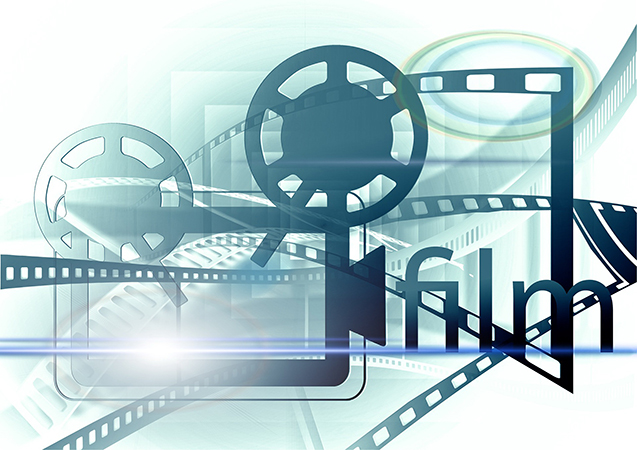

<a id="1"></a>  
# <p style="padding:10px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Libraries</p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score
from warnings import filterwarnings
filterwarnings(action='ignore')

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">Import Dataset</p>

In [2]:
import os
os.getcwd()

'C:\\Users\\dell\\Desktop\\intenship'

In [3]:
df=pd.read_csv(r'Movies_India.csv',encoding = 'ISO-8859-1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [6]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [9]:
obj=df.select_dtypes(['object'])
obj

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War","1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History","1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [10]:
num=df.select_dtypes(['int','float64'])
num

,Rating
1,7.0
3,4.4
5,4.7
6,7.4
8,5.6
...,...
15493,6.1
15494,6.2
15503,5.8
15505,4.5


# Label Encoding

In [11]:
le=LabelEncoder()

In [12]:
for i in obj:
    obj[i]=le.fit_transform(obj[i])
obj

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
1,0,88,9,229,1843,629,1352,2272,319
3,1,88,10,184,1164,1335,1198,719,2148
5,3,66,47,157,1892,1530,378,75,2045
6,4,74,42,289,34,2044,692,1112,2524
8,76,81,156,320,1133,135,1934,1175,1013
...,...,...,...,...,...,...,...,...,...
15493,5380,84,15,229,1312,1223,1861,1801,1615
15494,5381,70,53,133,178,2059,763,1619,1184
15503,5382,58,25,28,1348,1793,406,754,1685
15505,5384,68,29,38,1681,1025,112,2164,314


In [13]:
df_new=pd.concat([num,obj],axis=1)
df_new

,Rating,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
1,7.0,0,88,9,229,1843,629,1352,2272,319
3,4.4,1,88,10,184,1164,1335,1198,719,2148
5,4.7,3,66,47,157,1892,1530,378,75,2045
6,7.4,4,74,42,289,34,2044,692,1112,2524
8,5.6,76,81,156,320,1133,135,1934,1175,1013
...,...,...,...,...,...,...,...,...,...,...
15493,6.1,5380,84,15,229,1312,1223,1861,1801,1615
15494,6.2,5381,70,53,133,178,2059,763,1619,1184
15503,5.8,5382,58,25,28,1348,1793,406,754,1685
15505,4.5,5384,68,29,38,1681,1025,112,2164,314


In [14]:
df_new.drop(['Year'],axis=1,inplace=True)

In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rating    5659 non-null   float64
 1   Name      5659 non-null   int32  
 2   Duration  5659 non-null   int32  
 3   Genre     5659 non-null   int32  
 4   Votes     5659 non-null   int32  
 5   Director  5659 non-null   int32  
 6   Actor 1   5659 non-null   int32  
 7   Actor 2   5659 non-null   int32  
 8   Actor 3   5659 non-null   int32  
dtypes: float64(1), int32(8)
memory usage: 265.3 KB


<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">DATA VISUALIZATION</p> 

<a id="1"></a>  
### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:left;border-radius: 50px 50px;overflow:hidden;font-weight:200">Histogram</p>  

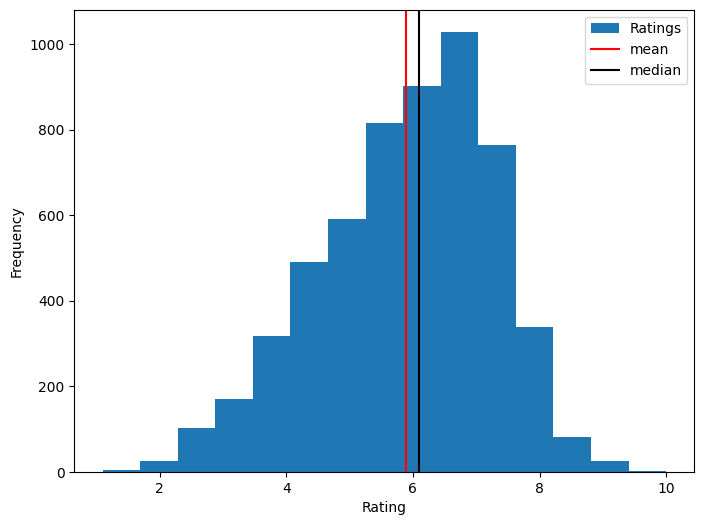

In [16]:
plt.figure(figsize=(8,6))
plt.hist(df_new['Rating'],bins=15,label='Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.axvline(df_new['Rating'].mean(),color='red',label='mean')
plt.axvline(df_new['Rating'].median(),color='black',label='median')
plt.legend()
plt.show()

<a id="1"></a>  
### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:left;border-radius: 50px 50px;overflow:hidden;font-weight:200">Bar Graph</p>  

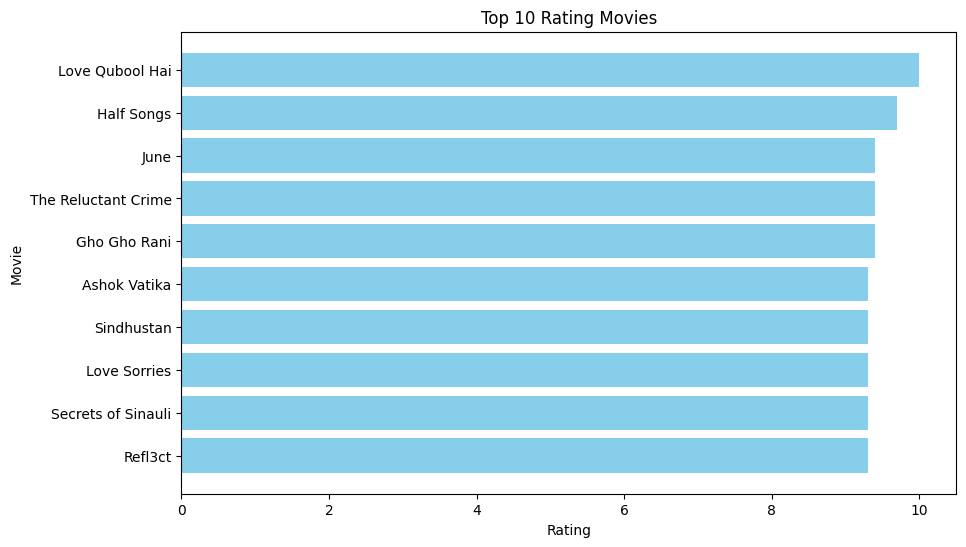

In [17]:
top_movies = df.sort_values(by = 'Rating',ascending = False).head(10)
plt.figure(figsize = (10,6))
plt.barh(top_movies['Name'],top_movies['Rating'], color = 'skyblue')
plt.xlabel('Rating')   # Label for x-axis (Rating)
plt.ylabel('Movie')   # Label for y-axis (Movie)
plt.title('Top 10 Rating Movies')
plt.gca().invert_yaxis()
plt.show()

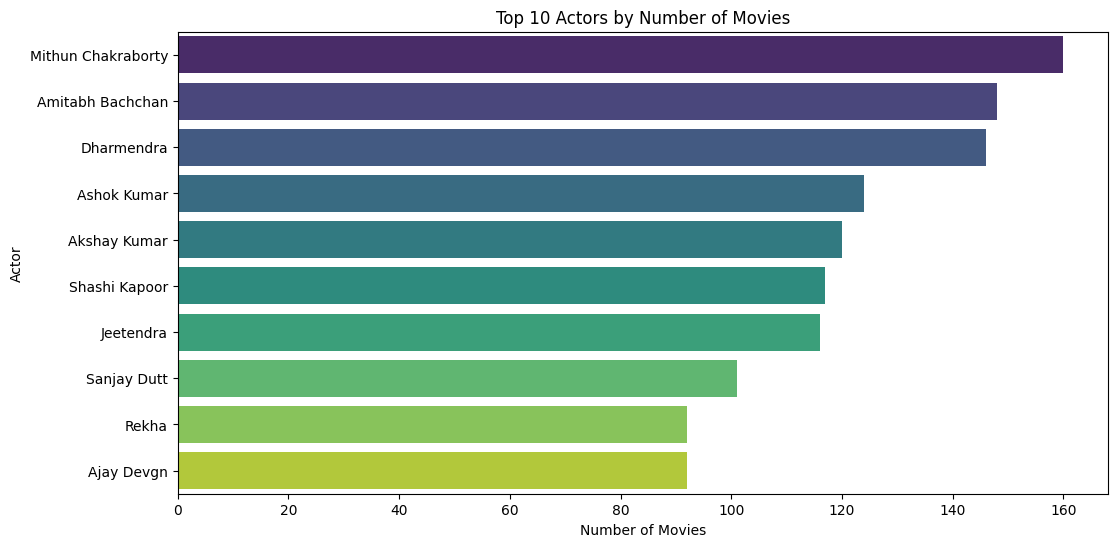

In [19]:
actors = pd.concat([df['Actor 1'],df['Actor 2'],df['Actor 3']])
actor_counts = actors.value_counts().reset_index()
actor_counts.columns = ['Actor','Number of Movies']
plt.figure(figsize = (12,6))
sns.barplot(x = 'Number of Movies', y = 'Actor',data = actor_counts.head(10),palette = 'viridis')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.title('Top 10 Actors by Number of Movies')
plt.show()

<a id="1"></a>  
### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:left;border-radius: 50px 50px;overflow:hidden;font-weight:200">Scatter Plot</p>  

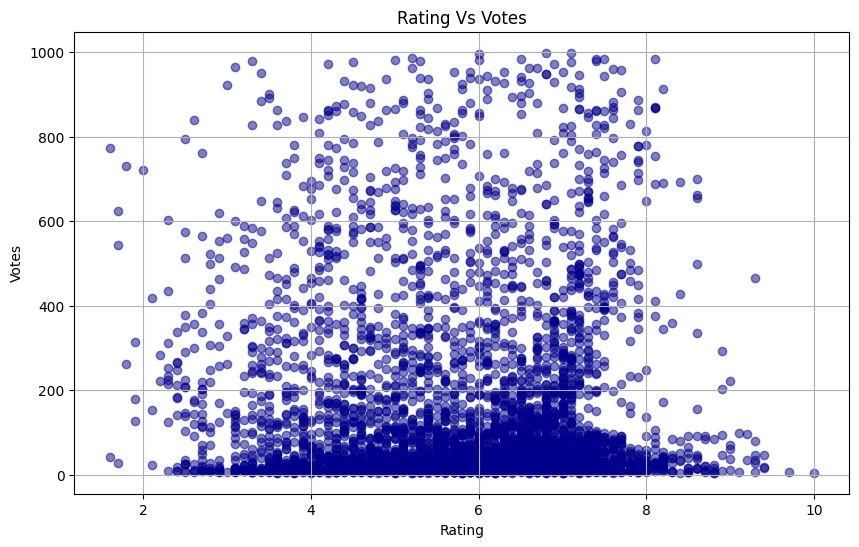

In [18]:
df['Votes'] = pd.to_numeric(df['Votes'],errors = 'coerce')
plt.figure(figsize = (10,6))
plt.scatter(df['Rating'], df['Votes'], alpha = 0.5, color = 'darkblue')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Rating Vs Votes')
plt.grid(True)
plt.show()

In [20]:
df_new.corr()

,Rating,Name,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
Rating,1.000000,0.000769,0.078761,0.121796,0.041839,-0.006824,0.023430,0.041353,0.042413
Name,0.000769,1.000000,-0.000384,0.007042,-0.001522,-0.008209,0.022058,0.002467,0.004074
Duration,0.078761,-0.000384,1.000000,0.021134,-0.013003,-0.001212,-0.016749,0.010311,-0.027461
Genre,0.121796,0.007042,0.021134,1.000000,-0.001571,-0.017921,0.042745,0.028168,0.007474
Votes,0.041839,-0.001522,-0.013003,-0.001571,1.000000,0.028058,-0.001961,-0.000175,-0.019166
Director,-0.006824,-0.008209,-0.001212,-0.017921,0.028058,1.000000,0.022918,0.018039,0.017915
Actor 1,0.023430,0.022058,-0.016749,0.042745,-0.001961,0.022918,1.000000,-0.000642,0.013170
Actor 2,0.041353,0.002467,0.010311,0.028168,-0.000175,0.018039,-0.000642,1.000000,0.010439
Actor 3,0.042413,0.004074,-0.027461,0.007474,-0.019166,0.017915,0.013170,0.010439,1.000000


<Axes: xlabel='Rating', ylabel='Votes'>

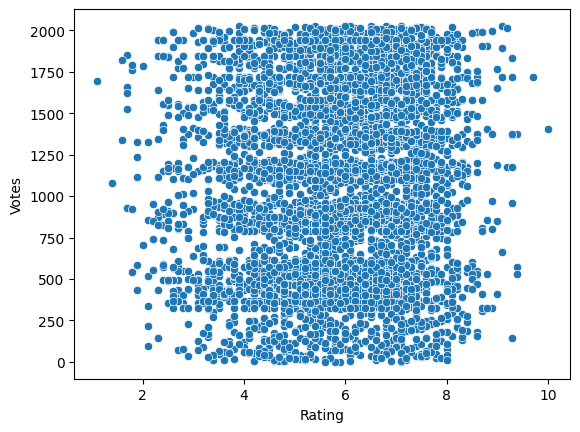

In [21]:
sns.scatterplot(data=df_new,x='Rating', y='Votes')

# Splitting X and y

In [22]:
X=df_new[['Genre','Duration','Votes','Director','Actor 1','Actor 2','Actor 3']]
y=df_new['Rating']

In [23]:
X

,Genre,Duration,Votes,Director,Actor 1,Actor 2,Actor 3
1,229,9,1843,629,1352,2272,319
3,184,10,1164,1335,1198,719,2148
5,157,47,1892,1530,378,75,2045
6,289,42,34,2044,692,1112,2524
8,320,156,1133,135,1934,1175,1013
...,...,...,...,...,...,...,...
15493,229,15,1312,1223,1861,1801,1615
15494,133,53,178,2059,763,1619,1184
15503,28,25,1348,1793,406,754,1685
15505,38,29,1681,1025,112,2164,314


In [24]:
y

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5659, dtype: float64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 2)

In [26]:
print(X.shape,X_train.shape,X_test.shape)

(5659, 7) (3961, 7) (1698, 7)


<a id="1"></a>  
# <p style="padding:10px;background-color:#254441;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model Building</p> 

<a id="1"></a>  
## <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:left;border-radius: 50px 50px;overflow:hidden;font-weight:200">LinearRegression</p>  

In [27]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
r2 = r2_score(y_test, y_pred)
absolute_r2 = abs(r2)
print("R-squared:", r2)
print("Absolute R-squared:", absolute_r2*10)
rounded_r2 = round(r2, 4)
print("R-squared (rounded):", rounded_r2)

R-squared: 0.006793901569646321
Absolute R-squared: 0.06793901569646321
R-squared (rounded): 0.0068


<a id="1"></a>  
## <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:left;border-radius: 50px 50px;overflow:hidden;font-weight:200">RandomForestRegressor</p>   

In [28]:
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
r2 = r2_score(y_test, y_pred)
absolute_r2 = abs(r2)
print("R-squared:", r2)
print("Absolute R-squared:", absolute_r2)
rounded_r2 = round(r2, 4)
print("R-squared (rounded):", rounded_r2)

R-squared: 0.076828676757007
Absolute R-squared: 0.076828676757007
R-squared (rounded): 0.0768


<a id="1"></a>  
## <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:left;border-radius: 50px 50px;overflow:hidden;font-weight:200">XGBRegressor</p>    

In [29]:
XGBR = XGBRegressor()
XGBR.fit(X_train, y_train)
y_pred = XGBR.predict(X_test)
r2 = r2_score(y_test, y_pred)
absolute_r2 = abs(r2)
print("R-squared:", r2)
print("Absolute R-squared:", absolute_r2*100)
rounded_r2 = round(abs(r2), 4)
print("R-squared (rounded):", rounded_r2)

R-squared: 0.00864704475814504
Absolute R-squared: 0.8647044758145039
R-squared (rounded): 0.0086


<a id="1"></a>  
## <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:left;border-radius: 50px 50px;overflow:hidden;font-weight:200">DecisionTreeRegression</p>     

In [30]:
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
r2 = r2_score(y_test, y_pred)
absolute_r2 = abs(r2)
print("R-squared:", r2)
print("Absolute R-squared:", absolute_r2)
rounded_r2 = round(abs(r2), 4)
print("R-squared (rounded):", rounded_r2)

R-squared: -0.710361615414183
Absolute R-squared: 0.710361615414183
R-squared (rounded): 0.7104


In [33]:
Accuracy = [ 0.06793901569646321, 0.076828676757007, 0.8647044758145039, 0.710361615414183]

Frame = pd.DataFrame({
    'Model': ['LinearRegression', 'RandomForestRegressor','XGBRegressor','DecisionTreeRegression'],
    'Accuracy': Accuracy
})

Frame.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,XGBRegressor,0.864704
3,DecisionTreeRegression,0.710362
1,RandomForestRegressor,0.076829
0,LinearRegression,0.067939


<a id="1"></a>  
# <p style="padding:10px;background-color:#254441;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Conculsion: - The order of the ✅Best Models from top to bottom:  XGBRegressor</p> 